In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import seaborn as sns
start mpl_toolkits import mplot3d

def lsm0(x, y):
    k = np.mean(x*y) / np.mean(x**2)
    sigma_k = (1 / len(x))*np.sqrt((np.mean(y**2) / (np.mean(x**2))) - k**2)
    return k, sigma_k

In [44]:
lab = pd.read_excel("1.xlsx")
lab

,a,steps1,steps2,steps3,steps4,steps5
0,3,1,1,1,4,4
1,13,36,49,36,64,36
2,23,121,289,196,196,169
3,33,529,441,441,576,400
4,43,529,576,784,529,676
...,...,...,...,...,...,...
95,959,344569,352836,356409,384400,372100
96,969,376996,390625,374544,357604,375769
97,979,370881,363609,352836,368449,383161
98,989,375769,379456,376996,378225,366025


In [46]:
lab["steps"] = lab[['steps1', 'steps2', 'steps3', 'steps4', 'steps5']].mean(axis=1)
lab

,a,steps1,steps2,steps3,steps4,steps5,steps
0,3,1,1,1,4,4,2.2
1,13,36,49,36,64,36,44.2
2,23,121,289,196,196,169,194.2
3,33,529,441,441,576,400,477.4
4,43,529,576,784,529,676,618.8
...,...,...,...,...,...,...,...
95,959,344569,352836,356409,384400,372100,362062.8
96,969,376996,390625,374544,357604,375769,375107.6
97,979,370881,363609,352836,368449,383161,367787.2
98,989,375769,379456,376996,378225,366025,375294.2


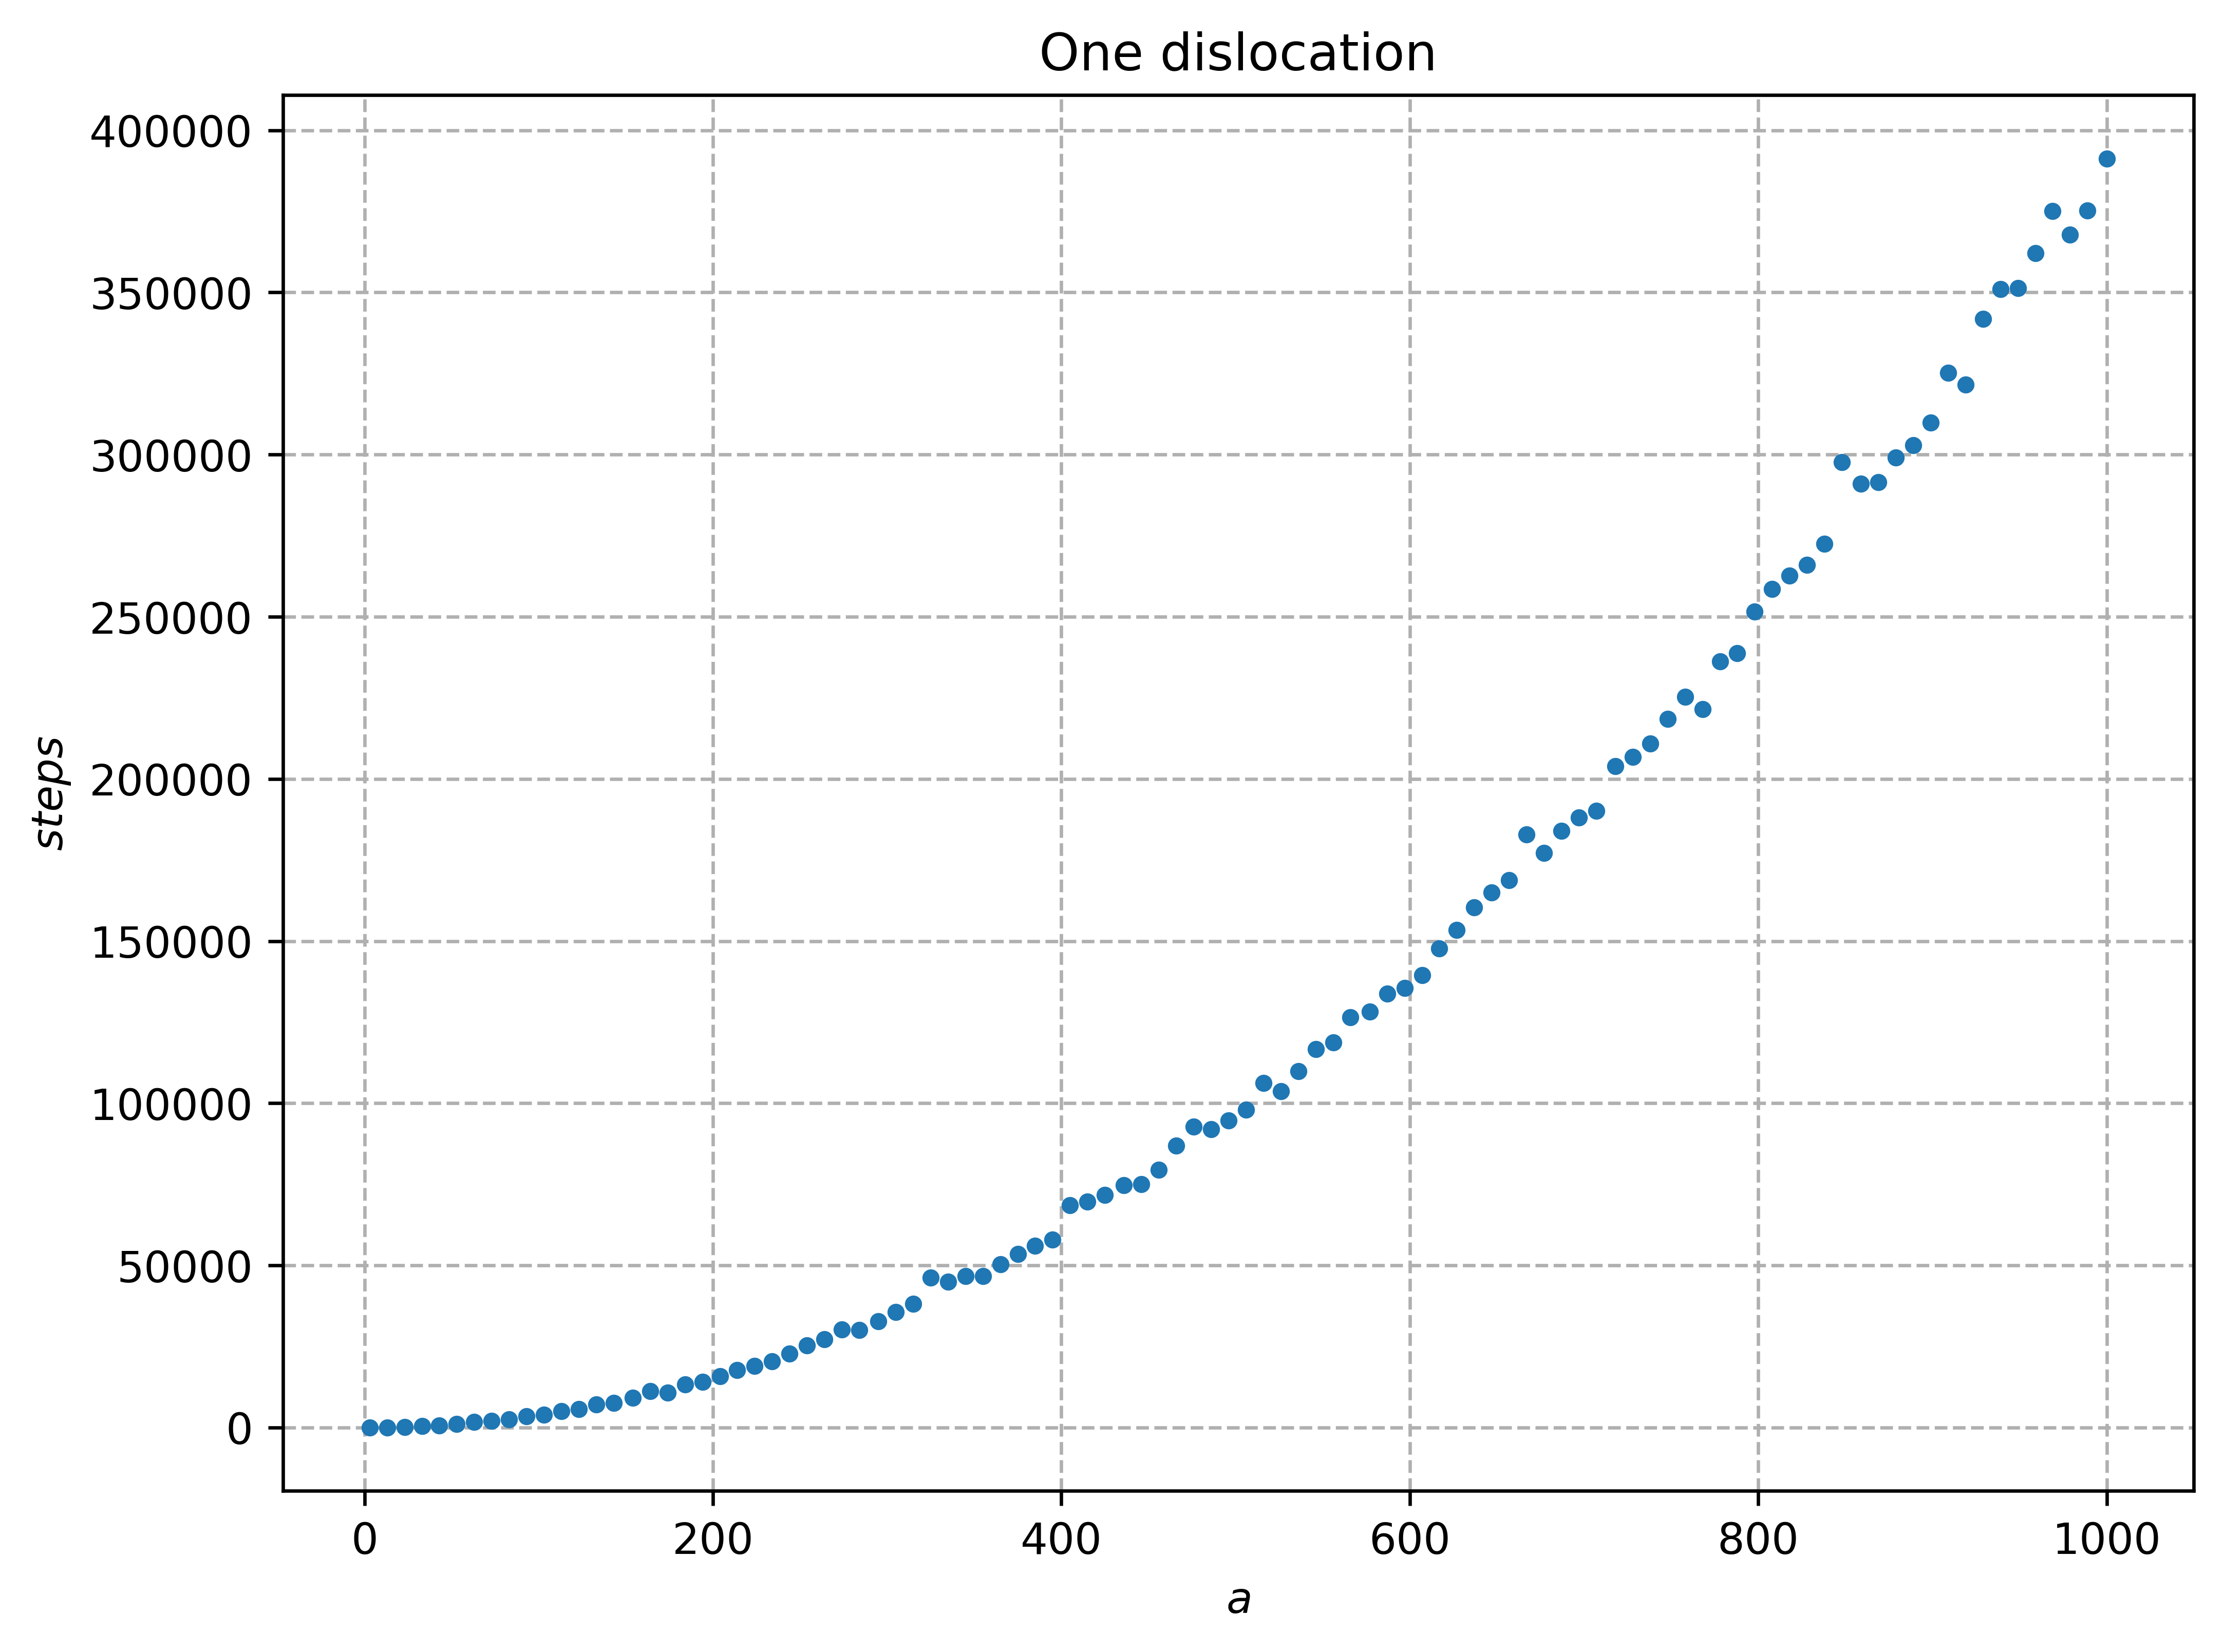

In [6]:
plt.figure(figsize=(8,6), dpi = 600) # размер графика
plt.title(r"One dislocation")
plt.xlabel("$a$") # подписи к осям
plt.ylabel("$steps$")
plt.grid(True, linestyle="--") # пунктирная сетка
plt.plot(lab["a"], lab["steps"], '.')

# plt.legend()
plt.show()

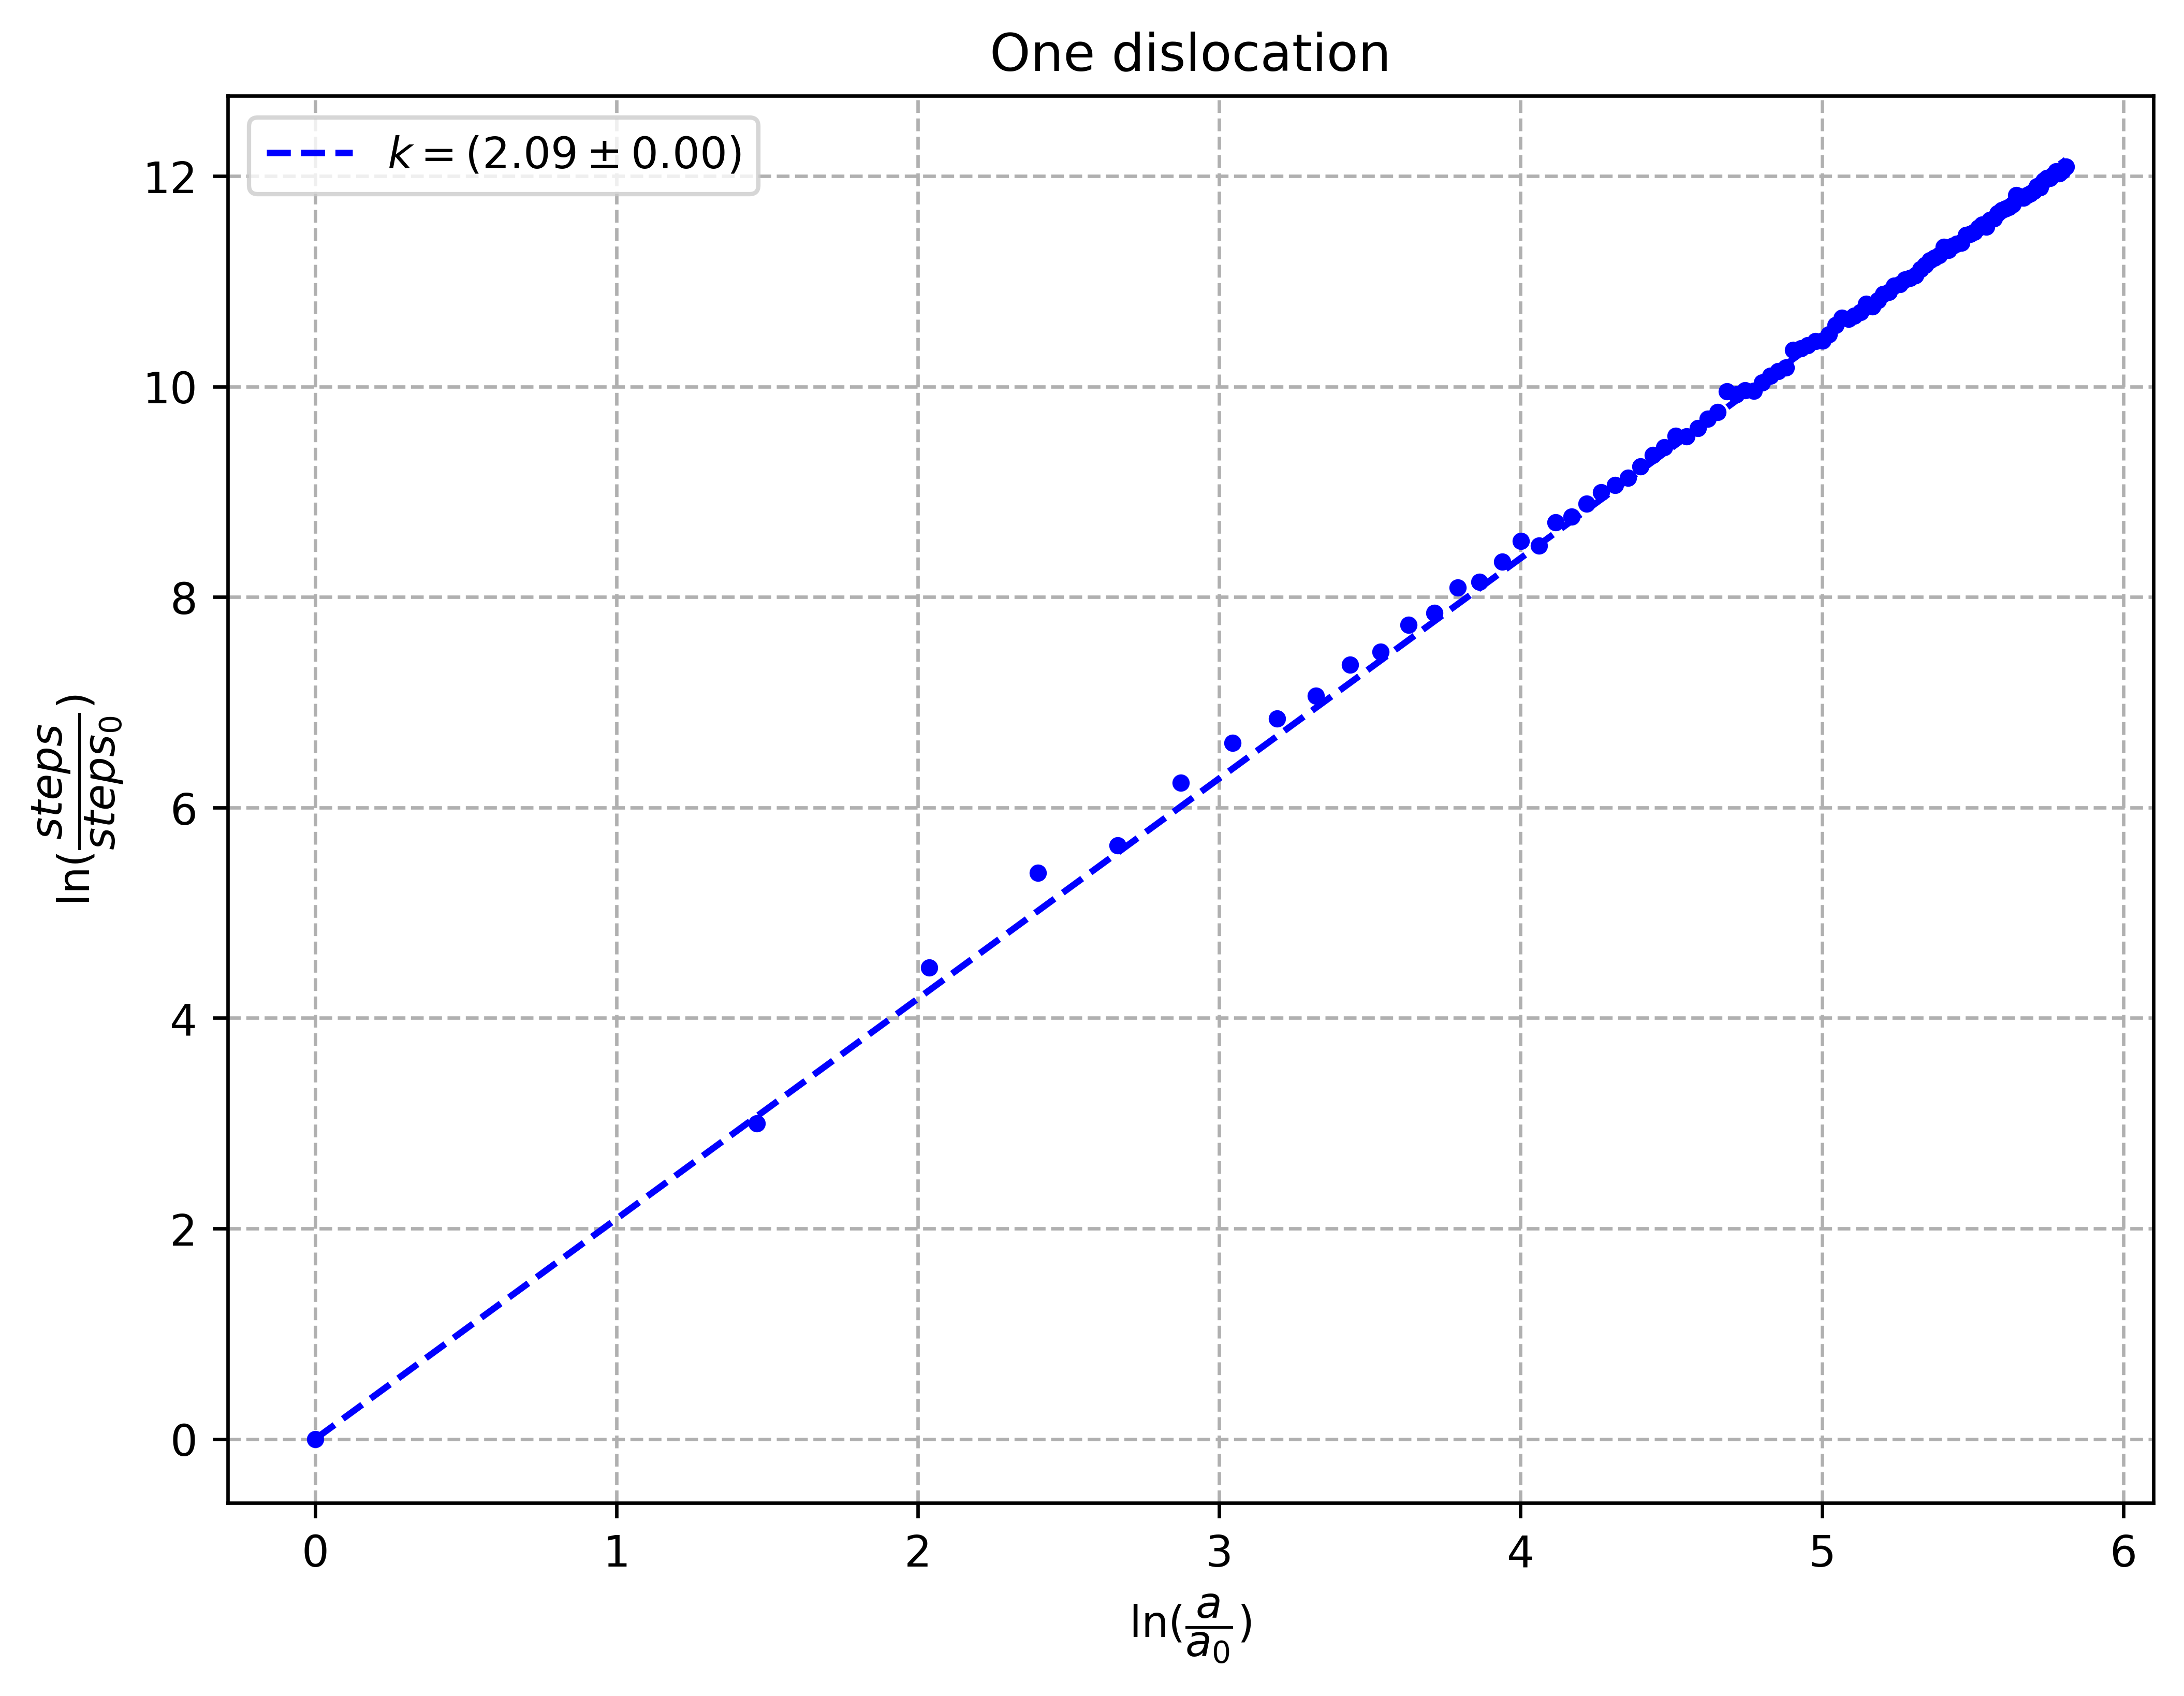

In [7]:
plt.figure(figsize=(8,6), dpi = 600) # размер графика
plt.title(r"One dislocation")
plt.xlabel("$\ln(\dfrac{a}{a_0})$") # подписи к осям
plt.ylabel("$\ln(\dfrac{steps}{steps_0})$")
plt.grid(True, linestyle="--") # пунктирная сетка

lab["log_a"] = np.log(lab["a"] / min(lab["a"])) 
lab["log_steps"] = np.log(lab["steps"] / min(lab["steps"]))
k_steps, sigma_k_steps = lsm0(lab["log_a"], lab["log_steps"])

plt.plot(lab["log_a"], lab["log_steps"], 'b.', label="")
plt.plot(lab["log_a"], k_steps*lab["log_a"],'b--', 
         label=r"$k = (%.2f \pm %.2f)$" % (k_steps, sigma_k_steps))

plt.legend()
plt.show()

In [85]:
lab1 = pd.read_excel("2.xlsx")
lab1

,dislocations300,steps1,steps2,steps3,steps4,steps5,steps6,dislocations237,steps6.1,steps7,...,Unnamed: 14,dislocations180,steps13,steps14,steps15,steps16,steps17,steps18,frac,steps
0,24.0,205.0,288.0,97.0,27.0,266.0,279.0,1.0,139.0,65.0,...,180.0,1.0,113.0,45.0,20.0,36.0,1.0,16.0,0.005,56
1,25.0,78.0,205.0,272.0,175.0,170.0,128.0,2.0,12.0,200.0,...,180.0,2.0,158.0,96.0,69.0,155.0,218.0,65.0,0.010,59
2,26.0,210.0,281.0,174.0,74.0,228.0,270.0,3.0,42.0,71.0,...,180.0,3.0,27.0,202.0,200.0,92.0,96.0,56.0,0.015,62
3,27.0,356.0,79.0,260.0,300.0,61.0,211.0,4.0,236.0,206.0,...,180.0,4.0,35.0,90.0,115.0,179.0,83.0,85.0,0.020,83
4,28.0,229.0,301.0,206.0,17.0,224.0,89.0,5.0,78.0,234.0,...,180.0,5.0,120.0,42.0,37.0,39.0,41.0,180.0,0.025,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.975,56
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.980,59
194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.985,59
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990,64


In [32]:
lab1["step"] = lab1[['steps1', 'steps2', 'steps3', 'steps4', 'steps5']].mean(axis=1)
lab1["fracs"] = (lab1["dislocations237"] / 237)**2 * 100
lab1

,dislocations300,steps1,steps2,steps3,steps4,steps5,steps6,dislocations237,steps6.1,steps7,...,dislocations180,steps13,steps14,steps15,steps16,steps17,steps18,steps300,steps237,steps180
0,24.0,205.0,288.0,97.0,27.0,266.0,279.0,1,139,65,...,1.0,113.0,45.0,20.0,36.0,1.0,16.0,176.6,98.8,43.0
1,25.0,78.0,205.0,272.0,175.0,170.0,128.0,2,12,200,...,2.0,158.0,96.0,69.0,155.0,218.0,65.0,180.0,124.4,139.2
2,26.0,210.0,281.0,174.0,74.0,228.0,270.0,3,42,71,...,3.0,27.0,202.0,200.0,92.0,96.0,56.0,193.4,113.0,123.4
3,27.0,356.0,79.0,260.0,300.0,61.0,211.0,4,236,206,...,4.0,35.0,90.0,115.0,179.0,83.0,85.0,211.2,188.2,100.4
4,28.0,229.0,301.0,206.0,17.0,224.0,89.0,5,78,234,...,5.0,120.0,42.0,37.0,39.0,41.0,180.0,195.4,101.2,55.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,97.0,164.0,99.0,303.0,191.0,56.0,149.0,74,141,103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162.6,129.8,NaN
74,98.0,4.0,168.0,135.0,214.0,39.0,156.0,75,148,76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0,153.6,NaN
75,99.0,11.0,129.0,234.0,150.0,356.0,124.0,76,10,39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.0,114.8,NaN
76,100.0,185.0,67.0,285.0,243.0,49.0,176.0,77,204,115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165.8,94.8,NaN


,dislocations300,steps1,steps2,steps3,steps4,steps5,steps6,dislocations237,steps6.1,steps7,...,steps15,steps16,steps17,steps18,steps300,steps237,steps180,frac300,frac237,frac180
0,24.0,205.0,288.0,97.0,27.0,266.0,279.0,1,139,65,...,20.0,36.0,1.0,16.0,176.6,98.8,43.0,0.640000,0.001780,0.003086
1,25.0,78.0,205.0,272.0,175.0,170.0,128.0,2,12,200,...,69.0,155.0,218.0,65.0,180.0,124.4,139.2,0.694444,0.007121,0.012346
2,26.0,210.0,281.0,174.0,74.0,228.0,270.0,3,42,71,...,200.0,92.0,96.0,56.0,193.4,113.0,123.4,0.751111,0.016023,0.027778
3,27.0,356.0,79.0,260.0,300.0,61.0,211.0,4,236,206,...,115.0,179.0,83.0,85.0,211.2,188.2,100.4,0.810000,0.028485,0.049383
4,28.0,229.0,301.0,206.0,17.0,224.0,89.0,5,78,234,...,37.0,39.0,41.0,180.0,195.4,101.2,55.8,0.871111,0.044509,0.077160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,97.0,164.0,99.0,303.0,191.0,56.0,149.0,74,141,103,...,NaN,NaN,NaN,NaN,162.6,129.8,NaN,10.454444,9.749150,NaN
74,98.0,4.0,168.0,135.0,214.0,39.0,156.0,75,148,76,...,NaN,NaN,NaN,NaN,112.0,153.6,NaN,10.671111,10.014421,NaN
75,99.0,11.0,129.0,234.0,150.0,356.0,124.0,76,10,39,...,NaN,NaN,NaN,NaN,176.0,114.8,NaN,10.890000,10.283252,NaN
76,100.0,185.0,67.0,285.0,243.0,49.0,176.0,77,204,115,...,NaN,NaN,NaN,NaN,165.8,94.8,NaN,11.111111,10.555645,NaN


<AxesSubplot:>

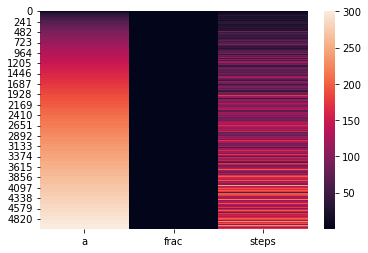

In [37]:
# sns.heatmap(lab1[['a', 'frac', 'steps']], linewidths=.5, annot=True, cbar=False, cmap='YlGnBu')
sns.heatmap(lab1[['a', 'frac', 'steps']])

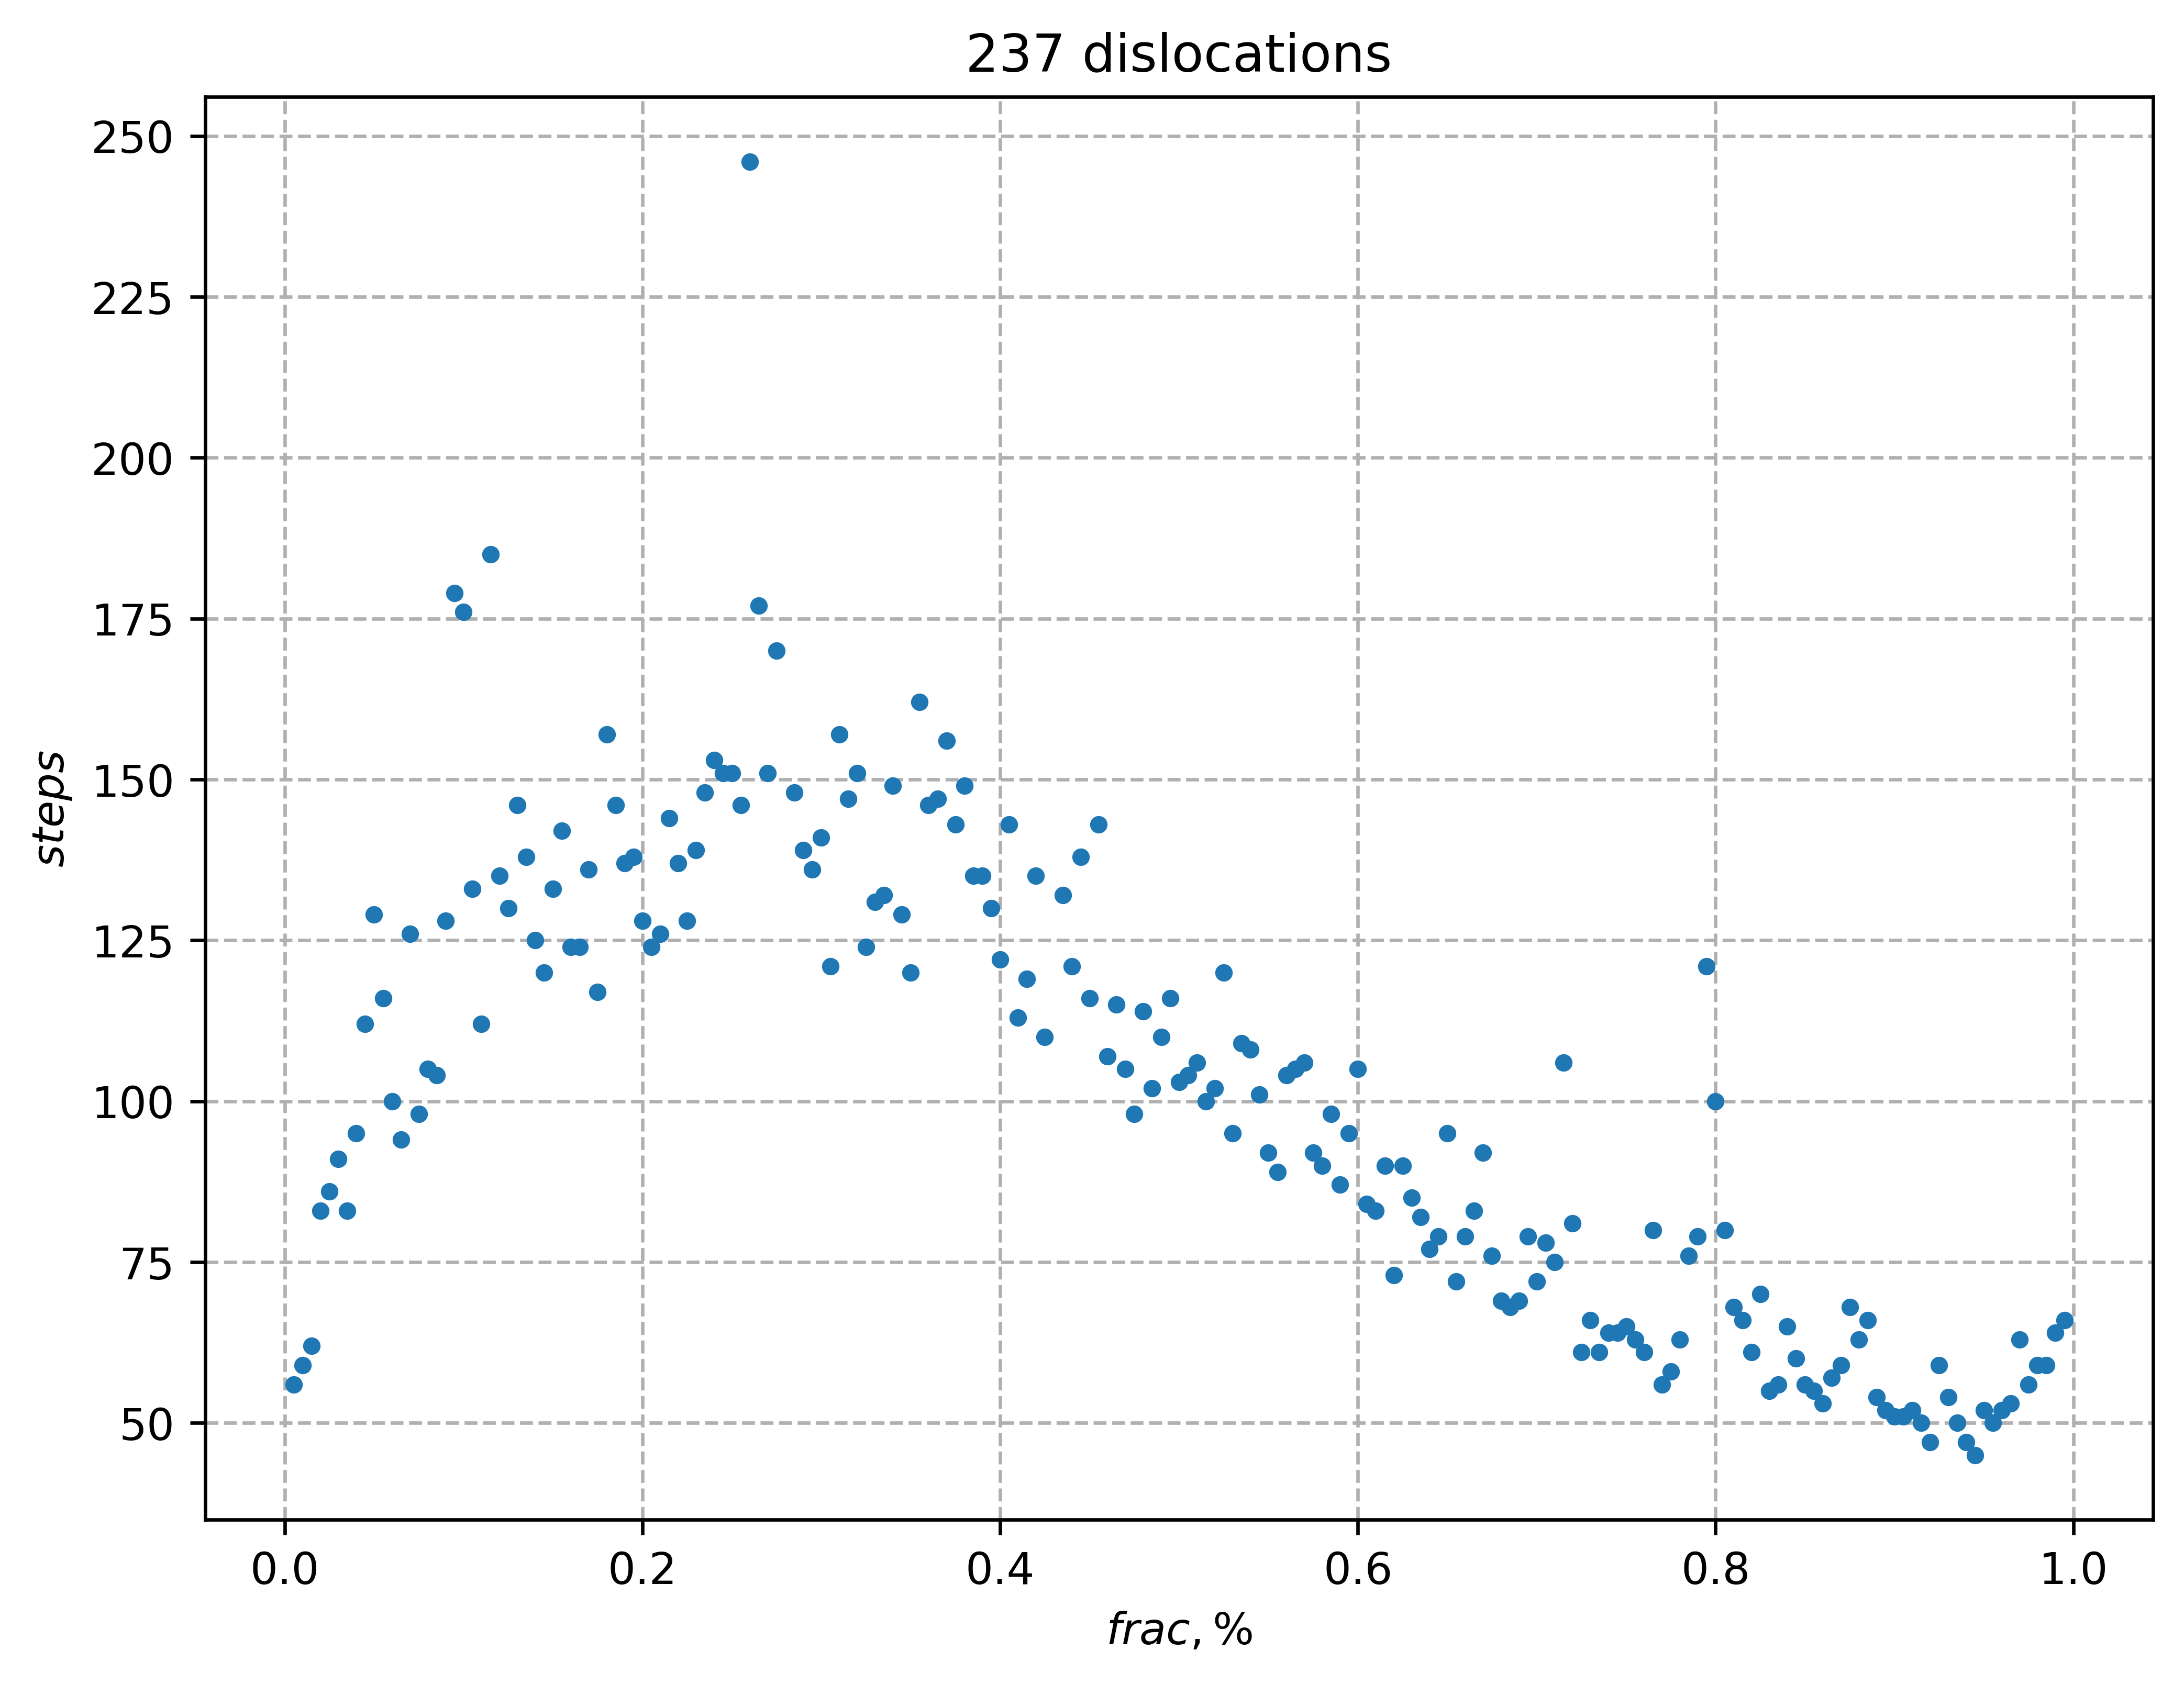

In [86]:
plt.figure(figsize=(8,6), dpi = 600) # размер графика
plt.title(r"237 dislocations")
plt.xlabel("$frac, \%$") # подписи к осям
plt.ylabel("$steps$")
plt.grid(True, linestyle="--") # пунктирная сетка
plt.plot(lab1["frac"], lab1["steps"], '.')

#plt.legend()
plt.show()

In [13]:
ax.view_int?

Object `ax.view_int` not found.


In [77]:
lab2 = pd.read_excel("3.xlsx")
lab2

,a,dislocation,steps7,steps8,steps9,steps10,steps11,steps12,dislocations159,steps1,steps2,steps3,steps4,steps5,steps6,frac,steps
0,3.0,1.0,3.0,1.0,2.0,1.0,2.0,3.0,1.0,69.0,242.0,23.0,140.0,181.0,25.0,0.005,6513
1,3.0,2.0,0.0,3.0,2.0,0.0,7.0,1.0,2.0,80.0,26.0,58.0,199.0,5.0,173.0,0.010,4854
2,3.0,3.0,1.0,3.0,4.0,1.0,3.0,0.0,3.0,42.0,204.0,174.0,211.0,48.0,192.0,0.015,4526
3,6.0,1.0,1.0,10.0,2.0,0.0,5.0,4.0,4.0,165.0,22.0,232.0,131.0,184.0,244.0,0.020,4323
4,6.0,2.0,4.0,3.0,1.0,3.0,2.0,8.0,5.0,145.0,104.0,149.0,183.0,78.0,214.0,0.025,3574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.975,1
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.980,1
194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.985,1
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990,1


In [73]:
lab2["step"] = lab2[['steps1', 'steps2', 'steps3', 'steps4', 'steps5','steps6']].mean(axis=1)
lab2["fracs"] = (lab2["dislocations231"] / 300)**2 * 100
lab2

,a,dislocation,steps7,steps8,steps9,steps10,steps11,steps12,dislocations159,steps1,steps2,steps3,steps4,steps5,steps6,frac,steps,steps231,steps159
0,3.0,1.0,3.0,1.0,2.0,1.0,2.0,3.0,1.0,69.0,242.0,23.0,140.0,181.0,25.0,0.005,56,113.333333,2.000000
1,3.0,2.0,0.0,3.0,2.0,0.0,7.0,1.0,2.0,80.0,26.0,58.0,199.0,5.0,173.0,0.010,59,90.166667,2.166667
2,3.0,3.0,1.0,3.0,4.0,1.0,3.0,0.0,3.0,42.0,204.0,174.0,211.0,48.0,192.0,0.015,62,145.166667,2.000000
3,6.0,1.0,1.0,10.0,2.0,0.0,5.0,4.0,4.0,165.0,22.0,232.0,131.0,184.0,244.0,0.020,83,163.000000,3.666667
4,6.0,2.0,4.0,3.0,1.0,3.0,2.0,8.0,5.0,145.0,104.0,149.0,183.0,78.0,214.0,0.025,86,145.500000,3.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.975,56,NaN,NaN
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.980,59,NaN,NaN
194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.985,59,NaN,NaN
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990,64,NaN,NaN


,dislocations231,steps1,steps2,steps3,steps4,steps5,steps6,dislocations159,steps7,steps8,...,steps18,steps300,steps237,steps180,steps231,steps159,steps90,frac231,frac159,frac90
0,1,56,232,25,171,38,187,1,69,242,...,130.0,118.166667,113.333333,73.833333,118.166667,113.333333,73.833333,0.001111,0.001780,0.003086
1,2,173,252,248,211,257,244,2,80,26,...,146.0,230.833333,90.166667,77.666667,230.833333,90.166667,77.666667,0.004444,0.007121,0.012346
2,3,25,224,285,62,151,72,3,42,204,...,48.0,136.500000,145.166667,72.833333,136.500000,145.166667,72.833333,0.010000,0.016023,0.027778
3,4,69,129,293,314,22,215,4,165,22,...,32.0,173.666667,163.000000,41.666667,173.666667,163.000000,41.666667,0.017778,0.028485,0.049383
4,5,16,102,260,113,47,349,5,145,104,...,118.0,147.833333,145.500000,59.166667,147.833333,145.500000,59.166667,0.027778,0.044509,0.077160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,6,66,358,134,308,276,95,154,214,...,NaN,191.333333,142.166667,NaN,191.333333,142.166667,NaN,10.027778,16.067582,NaN
95,96,64,155,21,131,24,248,96,230,199,...,NaN,107.166667,161.166667,NaN,107.166667,161.166667,NaN,10.240000,16.407627,NaN
96,97,357,37,228,111,264,254,97,188,108,...,NaN,208.500000,146.500000,NaN,208.500000,146.500000,NaN,10.454444,16.751233,NaN
97,98,171,64,304,56,176,199,98,40,112,...,NaN,161.666667,93.500000,NaN,161.666667,93.500000,NaN,10.671111,17.098399,NaN


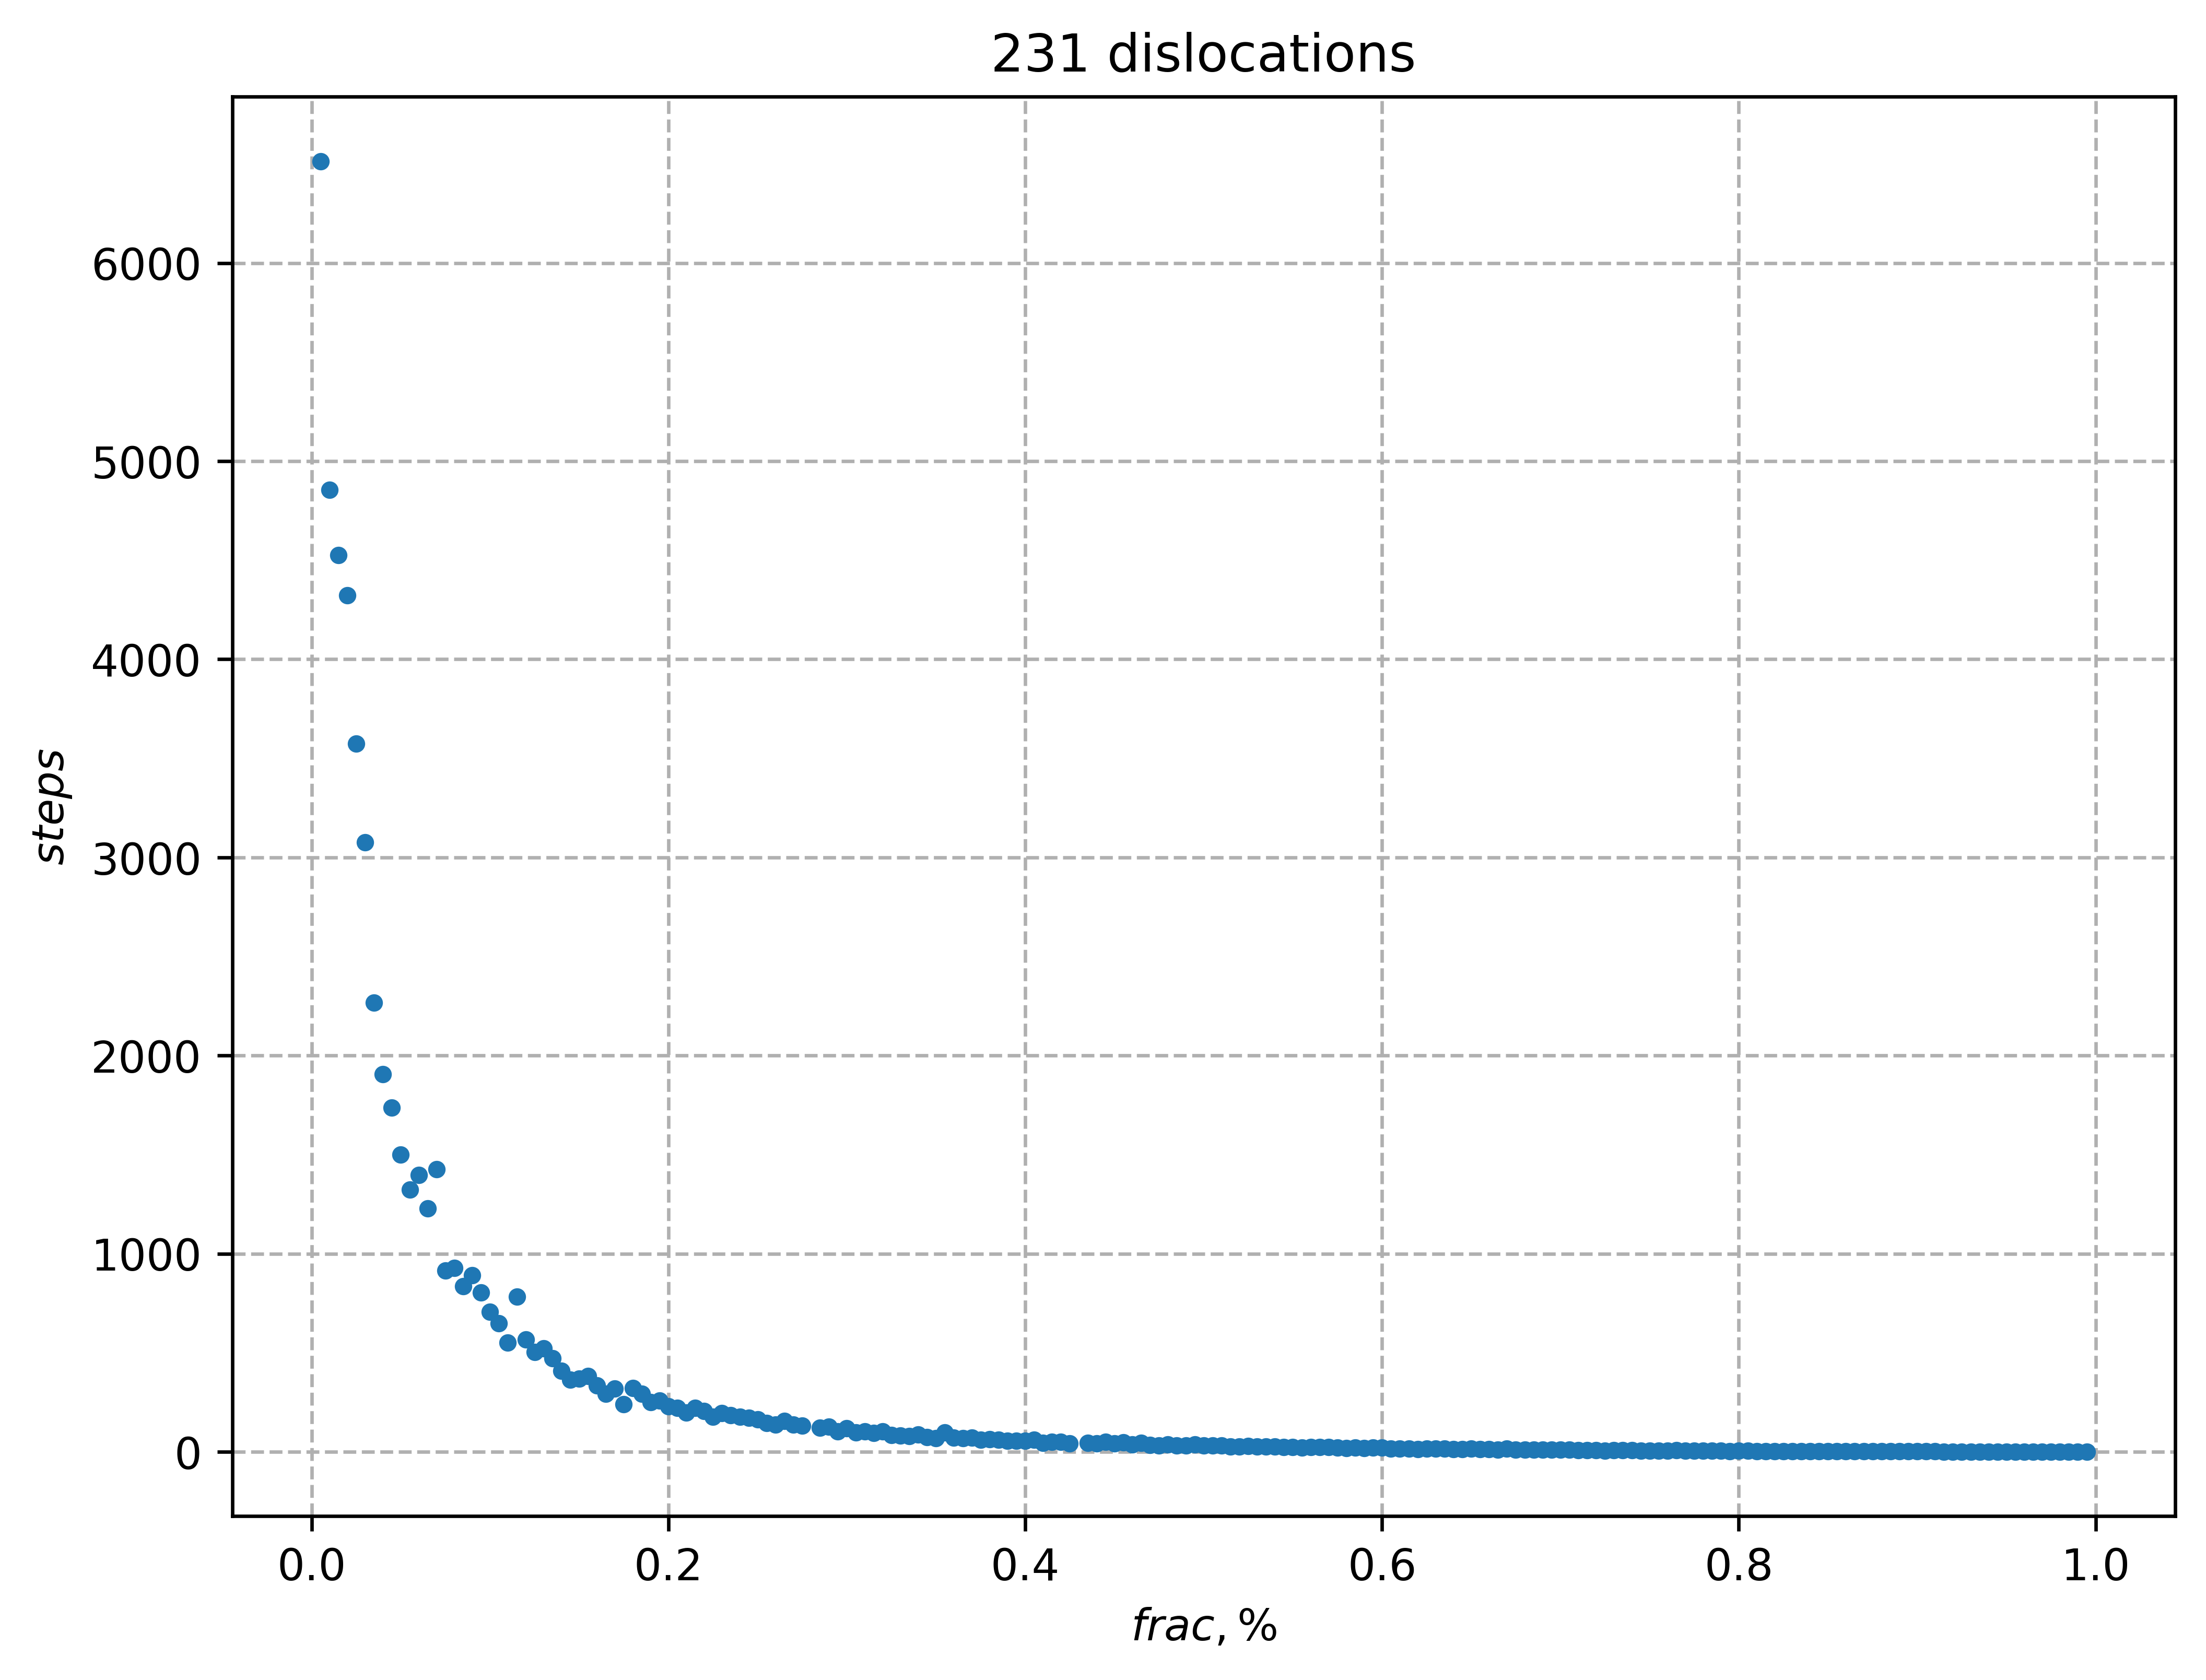

In [84]:
plt.figure(figsize=(8,6), dpi = 600) # размер графика
plt.title(r"231 dislocations")
plt.xlabel("$frac, \%$") # подписи к осям
plt.ylabel("$steps$")
# plt.ylim([0, 175])
plt.grid(True, linestyle="--") # пунктирная сетка
plt.plot(lab2["frac"], lab2["steps"], '.')

#plt.legend()
plt.show()

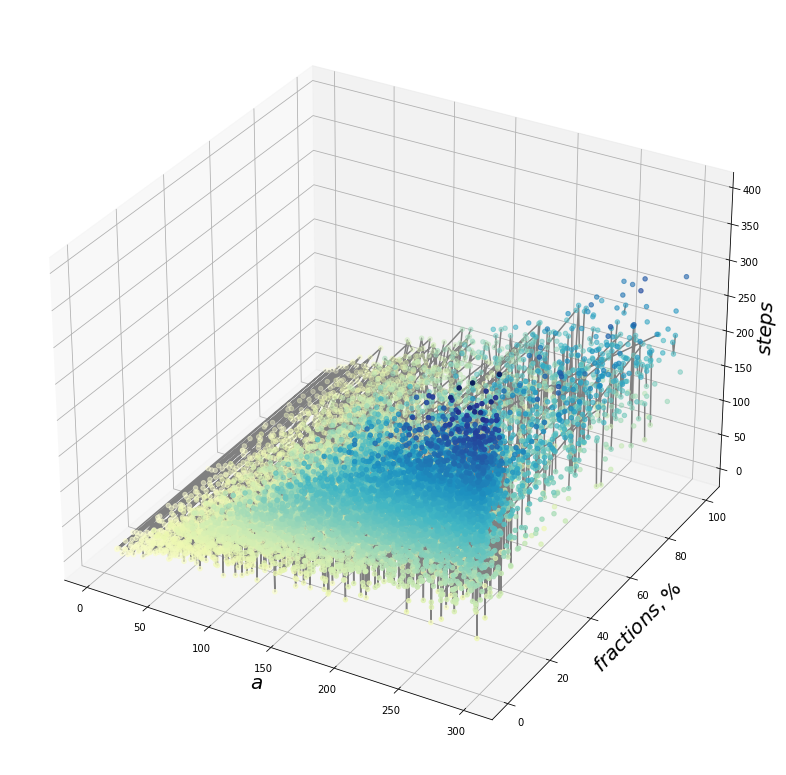

In [66]:
fig = plt.figure(figsize=(17, 14))
# ax = fig.axes(projection='3d')
ax = fig.add_subplot(projection='3d')

# Data for a three-dimensional line
xline = lab2["a"]
yline = lab2["frac"]
zline = lab2["steps"]
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
xdata = lab2["a"]
ydata = lab2["frac"]
zdata = lab2["steps"]

ax.set_xlabel('$a$', fontsize=20)
ax.set_ylabel('$fractions, \%$', fontsize=20)
ax.set_zlabel('$steps$', fontsize=20)

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='YlGnBu')